# 蒐集資料

In [2]:
import threading
import time

In [3]:
import requests
import bs4
import re
import pandas as pd
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/andyhsu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
from bs4.element import NavigableString

In [5]:
nltk.download('stopwords')
nltk_stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andyhsu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
lyrics = requests.get('https://mojim.com/twh107945.htm').text

In [3]:
lyrics_bs = bs4.BeautifulSoup(lyrics,'lxml')

In [4]:
body = lyrics_bs.find('div',id='inS')

## 包含歌名及連結的資料

In [5]:
links = body.find_all(class_=re.compile('hc[34]'))

In [6]:
for link in links[2:5]:
    print(link)
    print('-'*20)
    print(link.find_parent('dd').find('span',class_='hc2').text.replace('英文',''))
    print('a')

<span class="hc3">1.<a href="/twy107945x51x1.htm" title="Hold On 歌詞">Hold On</a></span>
--------------------
2021-03
a
<span class="hc4">
</span>
--------------------
2021-03
a
<span class="hc3">1.<a href="/twy107945x52x1.htm" title="2 Much 歌詞">2 Much</a><br/>2.<a href="/twy107945x52x2.htm" title="Deserve You 歌詞">Deserve You</a><br/>3.<a href="/twy107945x52x3.htm" title="As I Am 歌詞">As I Am</a><br/>4.<a href="/twy107945x52x4.htm" title="Off My Face 歌詞">Off My Face</a><br/>5.<a href="/twy107945x52x5.htm" title="Holy 歌詞">Holy</a><br/>6.<a href="/twy107945x52x6.htm" title="Unstable 歌詞">Unstable</a><br/>7.<a href="/twy107945x52x7.htm" title="MLK Interlude 歌詞">MLK Interlude</a><br/>8.<a href="/twy107945x52x8.htm" title="Die For You 歌詞">Die For You</a>
<a href="/twthx107945x52x8.htm" target="_blank" title="提供【Die For You】歌詞 謝謝您"><font color="#999999">(提供)</font></a></span>
--------------------
2021-03
a


In [7]:
song_name = []
lyric_website = []
date_info_all = []
for link in links:
    date_info = link.find_parent('dd').find('span',class_='hc2').text.replace('英文','')#使用父節點找到日期資料
    for l in link.find_all('a'):
        if '(提供)' in l.text or l.text == 'TBA':##提供代表沒有
            print('-')
            print('yes')
            print('-')
        else:
            print(date_info)
            #print(l)
            print(l.text)
            print('https://mojim.com/'+l['href'])
            date_info_all.append(date_info)
            song_name.append(l.text)
            lyric_website.append('https://mojim.com/'+l['href'])

2021-03
Hold On
https://mojim.com//twy107945x51x1.htm
2021-03
2 Much
https://mojim.com//twy107945x52x1.htm
2021-03
Deserve You
https://mojim.com//twy107945x52x2.htm
2021-03
As I Am
https://mojim.com//twy107945x52x3.htm
2021-03
Off My Face
https://mojim.com//twy107945x52x4.htm
2021-03
Holy
https://mojim.com//twy107945x52x5.htm
2021-03
Unstable
https://mojim.com//twy107945x52x6.htm
2021-03
MLK Interlude
https://mojim.com//twy107945x52x7.htm
2021-03
Die For You
https://mojim.com//twy107945x52x8.htm
-
yes
-
2021-03
Hold On
https://mojim.com//twy107945x52x9.htm
2021-03
Somebody
https://mojim.com//twy107945x52x10.htm
2021-03
Ghost
https://mojim.com//twy107945x52x11.htm
2021-03
Peaches
https://mojim.com//twy107945x52x12.htm
2021-03
Love You Different
https://mojim.com//twy107945x52x13.htm
-
yes
-
2021-03
Loved By You
https://mojim.com//twy107945x52x14.htm
-
yes
-
2021-03
Anyone
https://mojim.com//twy107945x52x15.htm
2021-03
Lonely(with benny blanco)
https://mojim.com//twy107945x52x16.htm
-
ye

In [8]:
from tqdm import tqdm

In [13]:
lyric = []
for x in tqdm(lyric_website):
    song = requests.get(x).text
    song_bs = bs4.BeautifulSoup(song,'lxml')
    song_lyric = song_bs.find('dd',id='fsZx3',class_='fsZx3').text
    song_lyric = `song_lyric.replace('更多更詳盡歌詞 在 ※ Mojim.com　魔鏡歌詞網','')
    #print(song_lyric)
    lyric.append(song_lyric)

100%|██████████| 394/394 [06:59<00:00,  1.07s/it]


In [14]:
JB = pd.DataFrame({'date':date_info_all,'song_name':song_name,'url':lyric_website,'lyric':lyric})
JB.to_csv('JB歌曲資料集.csv',encoding='utf-8-sig',index=True,header=True)

# 處理歌詞內的問題

In [6]:
JB = pd.read_csv('JB歌曲資料集.csv',encoding='utf-8-sig')

In [7]:
###因為我們取下來的歌詞都是連貫的，所以我們要想辦法每句分開
def lyric_sep(lyric):
    sep_part = re.findall('[a-z][A-Z]',lyric)
    for sep in sep_part:
        lyric = re.sub(sep,sep[0]+' '+sep[1],lyric)
    lyric = lyric.replace('\n','')
    lyric = lyric.replace('\u2005',' ')
    return lyric

In [8]:
#測試
song = requests.get('https://mojim.com//twy107945x39x5.htm').text
song_bs = bs4.BeautifulSoup(song,'lxml')
song_lyric = song_bs.find('dd',id='fsZx3',class_='fsZx3').text
song_lyric = song_lyric.replace('更多更詳盡歌詞 在 ※ Mojim.com　魔鏡歌詞網','')
song_lyric

"作詞：Johnta Austin,  Bryan Michael CoxOh no, oh no, ohThey say that hate has been sentSo let loose the talk of loveBefore they outlaw the kissBaby, give me one last hugThere's a dream that I've been chasingWant so badly for it to be realityAnd when you hold my hand then I understandThat it's meant to be 'cause, baby, when you're with meIt's like an angel came by, oh and took me to heavenLike you took me to heaven, girl'Cause when I stare in your eyes it couldn't be betterI don't want you to go, oh no, soLet the music blast, we gon' do our danceBring the doubters on, they don't matter at all'Cause this life's too long and this love's too strongSo baby, know for sure that I'll never let you goI got my favorite girlNot feeling no pain, no fearDon't have a care in the worldWhy would I when you are here?There's a moment I've been chasingAnd I finally caught it out on this floorBaby, there's no hesitation, no reservationBy taking a chance and more, oh no, becauseIt's like an angel came by and

In [9]:
#測試成果
lyric_sep(song_lyric)

"作詞：Johnta Austin,  Bryan Michael Cox Oh no, oh no, oh They say that hate has been sent So let loose the talk of love Before they outlaw the kiss Baby, give me one last hug There's a dream that I've been chasing Want so badly for it to be reality And when you hold my hand then I understand That it's meant to be 'cause, baby, when you're with me It's like an angel came by, oh and took me to heaven Like you took me to heaven, girl'Cause when I stare in your eyes it couldn't be better I don't want you to go, oh no, so Let the music blast, we gon' do our dance Bring the doubters on, they don't matter at all'Cause this life's too long and this love's too strong So baby, know for sure that I'll never let you go I got my favorite girl Not feeling no pain, no fear Don't have a care in the world Why would I when you are here?There's a moment I've been chasing And I finally caught it out on this floor Baby, there's no hesitation, no reservation By taking a chance and more, oh no, because It's li

In [10]:
#套用
JB['lyric'] = JB['lyric'].apply(lyric_sep)

In [11]:
#檢查
JB.loc[19,'lyric']

"Not sure what I was doing before ya I quit tryna figure it out Nothin' like havin' someone for you Someone beside you when it's time to lay down Fully committed, you're here for the stay down Look in the mirror, you right for the takedown Room for you in my coupe, let me open up the door Open up my eyes to a feelin' I can't ignore I need you all around me Oh yeah, yeah, yeah, yeah I need you all around me Wouldn't wanna be in any other place From my home to the road I'll make sure you're comfortable You make sure I'm comfortable Our love's unconditional I need you all around me All around me, yeah Never thought I could ever be loyal To someone other than myself I never thought I could ever be a spoiler Guess anything is possible with your help Anything's possible since you made my heart melt Gave me the best hand that I'd ever been dealt Room for you in my coupe, let me open up the door Open up my eyes to a feelin' I can't ignore I need you all around me, yeah Oh yeah, yeah, yeah, yea

# 使用re將取名還原處理

In [12]:
def song_recover(x):
    if '.' in x and '(' in x:
        g = x.split('(')[1]
        time = len(g.split(' '))-2
        try:
            y = re.sub("\s\(\w+.\s(\S+\s){%d}\w+\)"%time,"",x,re.I)##針對歌名中有feat且因為feat的人可能會有'非英文的組成，所以要特別注意
        except:
            y = x
        finally:
            return y
        
    elif '(' in x:
        g = x.split('(')[1]
        time = len(g.split(' '))-1
        try:
            y = re.sub("\s\((\w+\s){%d}\w+\)"%time,"",x,re.I)
        except:
            y = x
        finally:
            return y
        
    else:
        return x
song_recover("Beauty and a Beat (wideboys Radio Mix)")

'Beauty and a Beat'

In [13]:
JB['song_origin'] = JB['song_name'].apply(lambda x:song_recover(x))

In [14]:
JB

,Unnamed: 0,date,song_name,url,lyric,song_origin
0,0,2021-03,Hold On,https://mojim.com//twy107945x51x1.htm,You know you can call me if you need someone I...,Hold On
1,1,2021-03,2 Much,https://mojim.com//twy107945x52x1.htm,Injustice anywhere is a threat to justice ever...,2 Much
2,2,2021-03,Deserve You,https://mojim.com//twy107945x52x2.htm,When I'm in my thoughts sometimes It's hard to...,Deserve You
3,3,2021-03,As I Am,https://mojim.com//twy107945x52x3.htm,feat. Khalid By myself sometimes To give my mi...,As I Am
4,4,2021-03,Off My Face,https://mojim.com//twy107945x52x4.htm,One touch and you got me stoned Higher than I'...,Off My Face
...,...,...,...,...,...,...
389,389,NaN,Beauty And A Beat - feat. Nicki Minaj,https://mojim.com//twy107945x43x6.htm,"Yeah, Young Money, Nicki Minaj, Justin...Show ...",Beauty And A Beat - feat. Nicki Minaj
390,390,NaN,The Christmas Song (Chestnuts Roasting On and ...,https://mojim.com//twy107945x43x7.htm,Justin Bieber feat. Usher Chestnuts roasting o...,The Christmas Song
391,391,NaN,Beauty and a Beat (Wideboys Radio Mix),https://mojim.com//twy107945x43x8.htm,"Justin Bieber feat. Nicki Minaj Young Money, N...",Beauty and a Beat
392,392,NaN,One Time (main),https://mojim.com//twy107945x43x9.htm,"Hey, Hey, Hey, Hey Hey, Hey, Hey, Hey Me plus ...",One Time


In [15]:
JB_new = JB.drop_duplicates(subset = ['song_origin'],keep='last')#留下最後的是因為這才是最原始的創作
JB_new

,Unnamed: 0,date,song_name,url,lyric,song_origin
1,1,2021-03,2 Much,https://mojim.com//twy107945x52x1.htm,Injustice anywhere is a threat to justice ever...,2 Much
2,2,2021-03,Deserve You,https://mojim.com//twy107945x52x2.htm,When I'm in my thoughts sometimes It's hard to...,Deserve You
3,3,2021-03,As I Am,https://mojim.com//twy107945x52x3.htm,feat. Khalid By myself sometimes To give my mi...,As I Am
4,4,2021-03,Off My Face,https://mojim.com//twy107945x52x4.htm,One touch and you got me stoned Higher than I'...,Off My Face
6,6,2021-03,Unstable,https://mojim.com//twy107945x52x6.htm,feat. The Kid LAROISometimes I think I overthi...,Unstable
...,...,...,...,...,...,...
389,389,NaN,Beauty And A Beat - feat. Nicki Minaj,https://mojim.com//twy107945x43x6.htm,"Yeah, Young Money, Nicki Minaj, Justin...Show ...",Beauty And A Beat - feat. Nicki Minaj
390,390,NaN,The Christmas Song (Chestnuts Roasting On and ...,https://mojim.com//twy107945x43x7.htm,Justin Bieber feat. Usher Chestnuts roasting o...,The Christmas Song
391,391,NaN,Beauty and a Beat (Wideboys Radio Mix),https://mojim.com//twy107945x43x8.htm,"Justin Bieber feat. Nicki Minaj Young Money, N...",Beauty and a Beat
392,392,NaN,One Time (main),https://mojim.com//twy107945x43x9.htm,"Hey, Hey, Hey, Hey Hey, Hey, Hey, Hey Me plus ...",One Time


In [16]:
JB_new['lyric'] = JB_new['lyric'].apply(lambda x:x.replace("作詞：",''))
JB_new['lyric'] = JB_new['lyric'].apply(lambda x:x.replace('作曲：',' '))
JB_new['lyric'] = JB_new['lyric'].apply(lambda x:x.replace('、',' '))
JB_new['lyric'] = JB_new['lyric'].apply(lambda x:x.replace('feat. ',' '))
JB_new['lyric'] = JB_new['lyric'].apply(lambda x:x.replace('：',' '))

<ipython-input-16-32e8913b95db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JB_new['lyric'] = JB_new['lyric'].apply(lambda x:x.replace("作詞：",''))
<ipython-input-16-32e8913b95db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JB_new['lyric'] = JB_new['lyric'].apply(lambda x:x.replace('作曲：',' '))
<ipython-input-16-32e8913b95db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [17]:
JB_new['lyric_token'] = JB_new['lyric'].apply(lambda x:nltk.word_tokenize(x))

<ipython-input-17-5ba579e2f9c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JB_new['lyric_token'] = JB_new['lyric'].apply(lambda x:nltk.word_tokenize(x))


In [18]:
JB_new.reset_index(inplace=True,drop=True)
JB_new.drop(columns = ['Unnamed: 0'],inplace=True)
JB_new

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,date,song_name,url,lyric,song_origin,lyric_token
0,2021-03,2 Much,https://mojim.com//twy107945x52x1.htm,Injustice anywhere is a threat to justice ever...,2 Much,"[Injustice, anywhere, is, a, threat, to, justi..."
1,2021-03,Deserve You,https://mojim.com//twy107945x52x2.htm,When I'm in my thoughts sometimes It's hard to...,Deserve You,"[When, I, 'm, in, my, thoughts, sometimes, It,..."
2,2021-03,As I Am,https://mojim.com//twy107945x52x3.htm,Khalid By myself sometimes To give my mind so...,As I Am,"[Khalid, By, myself, sometimes, To, give, my, ..."
3,2021-03,Off My Face,https://mojim.com//twy107945x52x4.htm,One touch and you got me stoned Higher than I'...,Off My Face,"[One, touch, and, you, got, me, stoned, Higher..."
4,2021-03,Unstable,https://mojim.com//twy107945x52x6.htm,The Kid LAROISometimes I think I overthink An...,Unstable,"[The, Kid, LAROISometimes, I, think, I, overth..."
...,...,...,...,...,...,...
288,NaN,Beauty And A Beat - feat. Nicki Minaj,https://mojim.com//twy107945x43x6.htm,"Yeah, Young Money, Nicki Minaj, Justin...Show ...",Beauty And A Beat - feat. Nicki Minaj,"[Yeah, ,, Young, Money, ,, Nicki, Minaj, ,, Ju..."
289,NaN,The Christmas Song (Chestnuts Roasting On and ...,https://mojim.com//twy107945x43x7.htm,Justin Bieber Usher Chestnuts roasting on an ...,The Christmas Song,"[Justin, Bieber, Usher, Chestnuts, roasting, o..."
290,NaN,Beauty and a Beat (Wideboys Radio Mix),https://mojim.com//twy107945x43x8.htm,"Justin Bieber Nicki Minaj Young Money, Nicki ...",Beauty and a Beat,"[Justin, Bieber, Nicki, Minaj, Young, Money, ,..."
291,NaN,One Time (main),https://mojim.com//twy107945x43x9.htm,"Hey, Hey, Hey, Hey Hey, Hey, Hey, Hey Me plus ...",One Time,"[Hey, ,, Hey, ,, Hey, ,, Hey, Hey, ,, Hey, ,, ..."


In [19]:
JB_new

,date,song_name,url,lyric,song_origin,lyric_token
0,2021-03,2 Much,https://mojim.com//twy107945x52x1.htm,Injustice anywhere is a threat to justice ever...,2 Much,"[Injustice, anywhere, is, a, threat, to, justi..."
1,2021-03,Deserve You,https://mojim.com//twy107945x52x2.htm,When I'm in my thoughts sometimes It's hard to...,Deserve You,"[When, I, 'm, in, my, thoughts, sometimes, It,..."
2,2021-03,As I Am,https://mojim.com//twy107945x52x3.htm,Khalid By myself sometimes To give my mind so...,As I Am,"[Khalid, By, myself, sometimes, To, give, my, ..."
3,2021-03,Off My Face,https://mojim.com//twy107945x52x4.htm,One touch and you got me stoned Higher than I'...,Off My Face,"[One, touch, and, you, got, me, stoned, Higher..."
4,2021-03,Unstable,https://mojim.com//twy107945x52x6.htm,The Kid LAROISometimes I think I overthink An...,Unstable,"[The, Kid, LAROISometimes, I, think, I, overth..."
...,...,...,...,...,...,...
288,NaN,Beauty And A Beat - feat. Nicki Minaj,https://mojim.com//twy107945x43x6.htm,"Yeah, Young Money, Nicki Minaj, Justin...Show ...",Beauty And A Beat - feat. Nicki Minaj,"[Yeah, ,, Young, Money, ,, Nicki, Minaj, ,, Ju..."
289,NaN,The Christmas Song (Chestnuts Roasting On and ...,https://mojim.com//twy107945x43x7.htm,Justin Bieber Usher Chestnuts roasting on an ...,The Christmas Song,"[Justin, Bieber, Usher, Chestnuts, roasting, o..."
290,NaN,Beauty and a Beat (Wideboys Radio Mix),https://mojim.com//twy107945x43x8.htm,"Justin Bieber Nicki Minaj Young Money, Nicki ...",Beauty and a Beat,"[Justin, Bieber, Nicki, Minaj, Young, Money, ,..."
291,NaN,One Time (main),https://mojim.com//twy107945x43x9.htm,"Hey, Hey, Hey, Hey Hey, Hey, Hey, Hey Me plus ...",One Time,"[Hey, ,, Hey, ,, Hey, ,, Hey, Hey, ,, Hey, ,, ..."


# 歌曲太多，使用multi-threading處理移除stop_words

In [20]:
nltk_stopwords.extend(["'m","I","You","'ll","feat","you",".","The","作詞:Justin","Bieber","作曲","(",")","[","]","Verse","x3",
                      "作詞:Johnta","作詞:Anesha","作詞:Ronald","作詞:Mel","作詞:Mariah","作詞：Justin",",","'s","It","'","*"])

In [21]:
def stop_remove(task,stop_w):
    a =[]
    length = len(task)
    print(length)
    for b in range(length):
        print(b)
        lyric = task.iloc[b,5]
        for word in lyric:
            if word in stop_w:
                lyric.remove(word)
        #print(lyric)
        lyric = task.iloc[b,5]
    return pd.DataFrame(a)

In [22]:
import threading as td

In [23]:
a = [] 
t1 = td.Thread(target=stop_remove,args=(JB_new.iloc[:51,:],nltk_stopwords,))#0-49
t2 = td.Thread(target=stop_remove,args=(JB_new.iloc[50:101,:],nltk_stopwords,))#50-99
t3 = td.Thread(target=stop_remove,args=(JB_new.iloc[100:151,:],nltk_stopwords,))#100-149
t4 = td.Thread(target=stop_remove,args=(JB_new.iloc[150:201,:],nltk_stopwords,))#150-199
t5 = td.Thread(target=stop_remove,args=(JB_new.iloc[200:251,:],nltk_stopwords,))#200-249
t6 = td.Thread(target=stop_remove,args=(JB_new.iloc[250:293,:],nltk_stopwords,))#250-292
t1.start()
t2.start()
t3.start()
t4.start()
t5.start()
t6.start()

t1.join()
t2.join()
t3.join()
t4.join()
t5.join()
t6.join()

5151
0
1
2
3
4
5
6
7
8
9
10
11
51
12
13
14
15
160
1
17
18
19
2
20
2151
3


22
23
240
25
26
27
28
29
30
31451


32
33
43
1
34
35
36
370
2
35
1
2
0

4
3
038

4
5

39

40
41
42
616
75

2
3
4
43

57
86
6
7

8
9
10
11
1219

44
45
46
47
48
49
8


50
2
3

10
4
5
6
77
11
8
9
10
12
13
14
11
12
13
14
913
15
10
11
12
16
17
8
13
14

18
1915
16
20
21


17
181514

19
20
15
16
9
211622

22

23
24
2517
18
26
27
28
19
20
10
29
30

2117
23
24
25
18
19
11
26
27

20
2131
32
33
34
35


2228
29
30
31

23
32
33
34
3522
24
36
37
38
25
26
36
39
40
41
37
38
39
42

40
412312

42
43
44
45
46

2724
25
26
27
28
2913

30
31
32
33
1447
34

48
49
35
3628

37
38
39
40
41
29
3015

31
32
33
34

1650
35
3642

37
38
39
40
4317
41
42
43

18
19
44
45
46

47
48
4944

45
46
47
48
4920
50

21
22
23
50

24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [24]:
JB_new1 = JB_new[['date','song_name','url','lyric','song_origin','lyric_token']]

In [25]:
JB_new1.to_csv('JB歌曲資料集_去stop_words（新版）.csv',index=True,header=True,encoding='utf-8-sig')

In [26]:
JB_final = pd.read_csv('JB歌曲資料集_去stop_words（新版）.csv',encoding='utf-8-sig')

In [27]:
JB_final

,Unnamed: 0,date,song_name,url,lyric,song_origin,lyric_token
0,0,2021-03,2 Much,https://mojim.com//twy107945x52x1.htm,Injustice anywhere is a threat to justice ever...,2 Much,"['Injustice', 'anywhere', 'a', 'threat', 'just..."
1,1,2021-03,Deserve You,https://mojim.com//twy107945x52x2.htm,When I'm in my thoughts sometimes It's hard to...,Deserve You,"['When', 'thoughts', 'sometimes', 'hard', 'bel..."
2,2,2021-03,As I Am,https://mojim.com//twy107945x52x3.htm,Khalid By myself sometimes To give my mind so...,As I Am,"['Khalid', 'By', 'sometimes', 'To', 'give', 'm..."
3,3,2021-03,Off My Face,https://mojim.com//twy107945x52x4.htm,One touch and you got me stoned Higher than I'...,Off My Face,"['One', 'touch', 'got', 'stoned', 'Higher', ""'..."
4,4,2021-03,Unstable,https://mojim.com//twy107945x52x6.htm,The Kid LAROISometimes I think I overthink An...,Unstable,"['Kid', 'LAROISometimes', 'think', 'overthink'..."
...,...,...,...,...,...,...,...
288,288,NaN,Beauty And A Beat - feat. Nicki Minaj,https://mojim.com//twy107945x43x6.htm,"Yeah, Young Money, Nicki Minaj, Justin...Show ...",Beauty And A Beat - feat. Nicki Minaj,"['Yeah', 'Young', 'Money', 'Nicki', 'Minaj', '..."
289,289,NaN,The Christmas Song (Chestnuts Roasting On and ...,https://mojim.com//twy107945x43x7.htm,Justin Bieber Usher Chestnuts roasting on an ...,The Christmas Song,"['Justin', 'Usher', 'Chestnuts', 'roasting', '..."
290,290,NaN,Beauty and a Beat (Wideboys Radio Mix),https://mojim.com//twy107945x43x8.htm,"Justin Bieber Nicki Minaj Young Money, Nicki ...",Beauty and a Beat,"['Justin', 'Nicki', 'Minaj', 'Young', 'Money',..."
291,291,NaN,One Time (main),https://mojim.com//twy107945x43x9.htm,"Hey, Hey, Hey, Hey Hey, Hey, Hey, Hey Me plus ...",One Time,"['Hey', 'Hey', 'Hey', 'Hey', 'Hey', 'Hey', 'He..."


In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [29]:
sid = SentimentIntensityAnalyzer()

In [30]:
JB_final = JB_final.drop(columns = ['Unnamed: 0'])

In [31]:
sid.polarity_scores("I love you")

{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}

In [32]:
def score(x,y):
    try:
        score = sid.polarity_scores(x)[y]
    except:
        score = 'unknown'
    finally:
        return score

In [33]:
JB_final['sentiment_score(neg)'] = JB_final['lyric'].apply(lambda x:score(x,'neg'))
JB_final['sentiment_score(pos)'] = JB_final['lyric'].apply(lambda x:score(x,'pos'))
JB_final['sentiment_score(neu)'] = JB_final['lyric'].apply(lambda x:score(x,'neu'))

In [34]:
JB_final

,date,song_name,url,lyric,song_origin,lyric_token,sentiment_score(neg),sentiment_score(pos),sentiment_score(neu)
0,2021-03,2 Much,https://mojim.com//twy107945x52x1.htm,Injustice anywhere is a threat to justice ever...,2 Much,"['Injustice', 'anywhere', 'a', 'threat', 'just...",0.118,0.143,0.739
1,2021-03,Deserve You,https://mojim.com//twy107945x52x2.htm,When I'm in my thoughts sometimes It's hard to...,Deserve You,"['When', 'thoughts', 'sometimes', 'hard', 'bel...",0.02,0.072,0.908
2,2021-03,As I Am,https://mojim.com//twy107945x52x3.htm,Khalid By myself sometimes To give my mind so...,As I Am,"['Khalid', 'By', 'sometimes', 'To', 'give', 'm...",0.102,0.219,0.679
3,2021-03,Off My Face,https://mojim.com//twy107945x52x4.htm,One touch and you got me stoned Higher than I'...,Off My Face,"['One', 'touch', 'got', 'stoned', 'Higher', ""'...",0.069,0.12,0.811
4,2021-03,Unstable,https://mojim.com//twy107945x52x6.htm,The Kid LAROISometimes I think I overthink An...,Unstable,"['Kid', 'LAROISometimes', 'think', 'overthink'...",0.09,0.343,0.567
...,...,...,...,...,...,...,...,...,...
288,NaN,Beauty And A Beat - feat. Nicki Minaj,https://mojim.com//twy107945x43x6.htm,"Yeah, Young Money, Nicki Minaj, Justin...Show ...",Beauty And A Beat - feat. Nicki Minaj,"['Yeah', 'Young', 'Money', 'Nicki', 'Minaj', '...",0.029,0.195,0.776
289,NaN,The Christmas Song (Chestnuts Roasting On and ...,https://mojim.com//twy107945x43x7.htm,Justin Bieber Usher Chestnuts roasting on an ...,The Christmas Song,"['Justin', 'Usher', 'Chestnuts', 'roasting', '...",0.024,0.139,0.838
290,NaN,Beauty and a Beat (Wideboys Radio Mix),https://mojim.com//twy107945x43x8.htm,"Justin Bieber Nicki Minaj Young Money, Nicki ...",Beauty and a Beat,"['Justin', 'Nicki', 'Minaj', 'Young', 'Money',...",0.01,0.187,0.803
291,NaN,One Time (main),https://mojim.com//twy107945x43x9.htm,"Hey, Hey, Hey, Hey Hey, Hey, Hey, Hey Me plus ...",One Time,"['Hey', 'Hey', 'Hey', 'Hey', 'Hey', 'Hey', 'He...",0.027,0.286,0.688


# 爬取下來的資料2010-03 My world2.0專輯以前的日期皆沒有，根據資料world2.0為第一張專輯，故無日期的皆刪除

In [35]:
JB_final_date = JB_final[~JB_final['date'].isna()]
JB_final_date = JB_final_date.dropna(axis=0,subset=['lyric'])

In [36]:
JB_final_date

,date,song_name,url,lyric,song_origin,lyric_token,sentiment_score(neg),sentiment_score(pos),sentiment_score(neu)
0,2021-03,2 Much,https://mojim.com//twy107945x52x1.htm,Injustice anywhere is a threat to justice ever...,2 Much,"['Injustice', 'anywhere', 'a', 'threat', 'just...",0.118,0.143,0.739
1,2021-03,Deserve You,https://mojim.com//twy107945x52x2.htm,When I'm in my thoughts sometimes It's hard to...,Deserve You,"['When', 'thoughts', 'sometimes', 'hard', 'bel...",0.02,0.072,0.908
2,2021-03,As I Am,https://mojim.com//twy107945x52x3.htm,Khalid By myself sometimes To give my mind so...,As I Am,"['Khalid', 'By', 'sometimes', 'To', 'give', 'm...",0.102,0.219,0.679
3,2021-03,Off My Face,https://mojim.com//twy107945x52x4.htm,One touch and you got me stoned Higher than I'...,Off My Face,"['One', 'touch', 'got', 'stoned', 'Higher', ""'...",0.069,0.12,0.811
4,2021-03,Unstable,https://mojim.com//twy107945x52x6.htm,The Kid LAROISometimes I think I overthink An...,Unstable,"['Kid', 'LAROISometimes', 'think', 'overthink'...",0.09,0.343,0.567
...,...,...,...,...,...,...,...,...,...
150,2010-11環球,Eenie Meenie - Album Version(feat. Sean Kingst...,https://mojim.com//twy107945x5x29.htm,Eenie meenie miney mo Catch a bad chick by her...,Eenie Meenie - Album Version(feat. Sean Kingst...,"['Eenie', 'meenie', 'miney', 'mo', 'Catch', 'b...",0.073,0.1,0.827
151,2010-11環球,Up - Album Version(一飛衝天),https://mojim.com//twy107945x5x30.htm,Is a big big world It's easy to get lost baby ...,Up - Album Version(一飛衝天),"['Is', 'big', 'big', 'world', ""'s"", 'easy', 'g...",0.046,0.193,0.761
152,2010-11環球,That Should Be Me - Album Version(那個人是我),https://mojim.com//twy107945x5x31.htm,Everybody's laughing in my mind Rumors spreadi...,That Should Be Me - Album Version(那個人是我),"['Everybody', 'laughing', 'mind', 'Rumors', 's...",0.079,0.136,0.785
153,2010-04環球,First Dance Featuring Usher,https://mojim.com//twy107945x1x6.htm,"I close my eyes,I see me and you at the prom,w...",First Dance Featuring Usher,"['close', 'eyes', 'see', 'at', 'prom', ""'ve"", ...",0.015,0.102,0.883


In [37]:
re.search('\w+-\d{2}','Mar-21')[0]

'Mar-21'

In [38]:
def date_clean(x):
    try:
        date_c = re.search('\d{4}-\d{2}',x)[0]
    except:
        print(x)
        date_c = re.search('\d{4}',x)[0]
    finally:
        return date_c

In [39]:
JB_final_date['date'] = JB_final_date['date'].apply(date_clean)

2013
2013
2013
2013
2013
2013
2013
2013
2013
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2011


In [40]:
song_pos_df = pd.DataFrame(JB_final_date.groupby('date')['sentiment_score(pos)'].sum()\
/JB_final_date.groupby('date')['sentiment_score(pos)'].count())
song_pos_df.reset_index(inplace=True)

In [41]:
song_neg_df = pd.DataFrame(JB_final_date.groupby('date')['sentiment_score(neg)'].sum()\
/JB_final_date.groupby('date')['sentiment_score(neg)'].count())
song_neg_df.reset_index(inplace=True)

In [42]:
song_motion_df = pd.merge(left = song_pos_df,right = song_neg_df,on='date')
song_motion_df['date'] = pd.to_datetime(song_motion_df['date'])
song_motion_df

,date,sentiment_score(pos),sentiment_score(neg)
0,2010-03-01,0.165000,0.011000
1,2010-04-01,0.102000,0.015000
2,2010-11-01,0.166000,0.068548
3,2011-01-01,0.138000,0.023000
4,2011-02-01,0.123125,0.062875
5,2011-11-01,0.151769,0.034385
6,2012-01-01,0.195105,0.055789
7,2012-06-01,0.162562,0.055250
8,2013-01-01,0.142889,0.100111
9,2013-10-01,0.157000,0.088000


In [43]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

### 從圖形中可以看出Justin Bieber整體歌曲風格是較為正向的，但在2013的歌曲正反向的數值差距減小甚至「超車」的現象；根據wikipedia的資料，Justin Bieber的爭議事件也大多發生在此時，兩者不謀而合

In [44]:
trace1 = go.Scatter(
                y = song_motion_df['sentiment_score(pos)'],
                x = song_motion_df.date,
                mode = 'lines',
                name = 'positive',
                marker = dict(color = 'rgba(221,11,2,0.5)'),
                text = song_motion_df.date
                    )

trace2 = go.Scatter(
                y = song_motion_df['sentiment_score(neg)'],
                x = song_motion_df.date,
                mode = 'lines',
                name = 'negative',
                marker = dict(color = 'rgba(21,121,1,0.5)'),
                text = song_motion_df.date
                    )

data = [trace1,trace2]

layout = dict(
        title = 'Justin Bieber motion score of all time',
        titlefont = dict(color='rgba(0,14,211,0.4)'),
        xaxis = dict(title='Date',ticklen=100,zeroline=True),
        yaxis = dict(title='Score')
            )

fig = dict(data = data,layout = layout)

iplot(fig)

# 將歌曲切成三個部分（1.2013/01前 2.2013/01-2013/11 3.2013/11後）

In [45]:
JB_final_date['date'] = pd.to_datetime(JB_final_date['date'])

In [46]:
JB_final_date_1 = JB_final_date[JB_final_date['date']<'2013-01-01']
JB_final_date_2 = JB_final_date[(JB_final_date['date'] >= '2013-01-01') & (JB_final_date['date'] <= '2013-12-01')]
JB_final_date_3 = JB_final_date[JB_final_date['date']>'2013-12-01']

In [47]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import ast

# Part1

In [48]:
JB_final_date_1_list = []
for x in JB_final_date_1['lyric_token']:
    #print(type(ast.literal_eval(x)))
    JB_final_date_1_list.extend(ast.literal_eval(x))

In [49]:
font_path = 'Hiragino Sans GB.ttc'
wc = WordCloud(background_color = 'black',font_path = font_path)
JB_final_1 = (' ').join(JB_final_date_1_list)
wc.generate(JB_final_1)

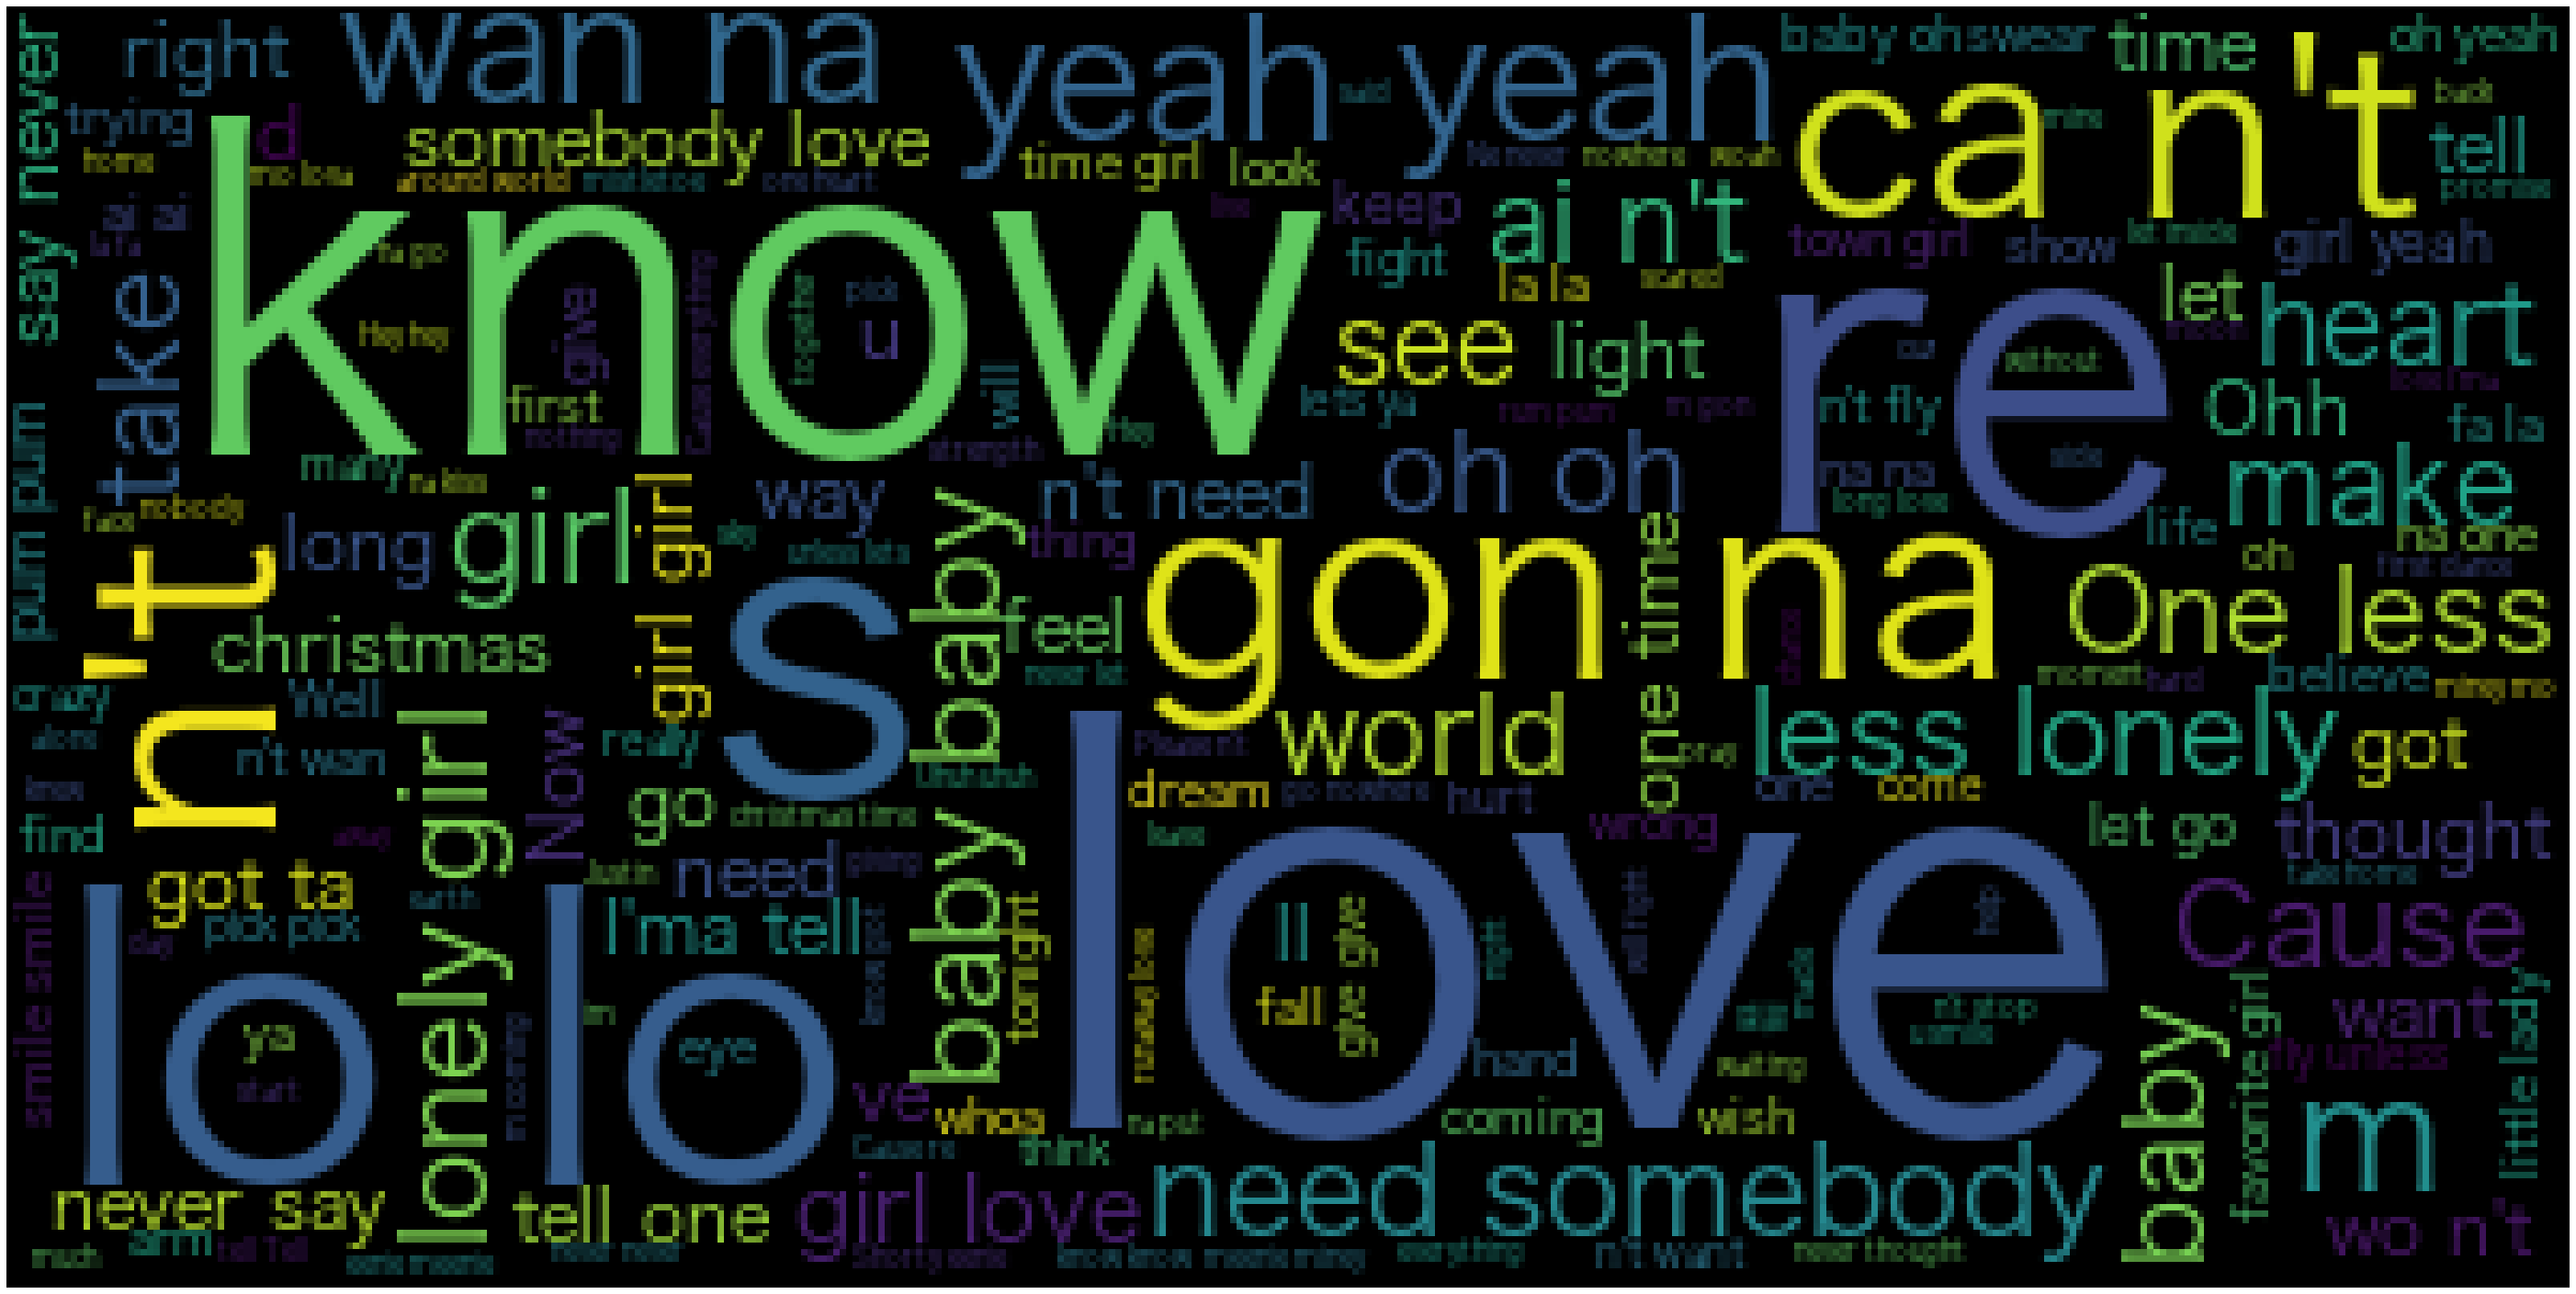

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
plt.imshow(wc)
plt.axis("off")
plt.show()

# Part2

In [51]:
JB_final_date_2_list = []
for x in JB_final_date_2['lyric_token']:
    #print(type(ast.literal_eval(x)))
    JB_final_date_2_list.extend(ast.literal_eval(x))

In [52]:
font_path = 'Hiragino Sans GB.ttc'
wc = WordCloud(background_color = 'black',font_path = font_path)
JB_final_2 = (' ').join(JB_final_date_2_list)
wc.generate(JB_final_2)

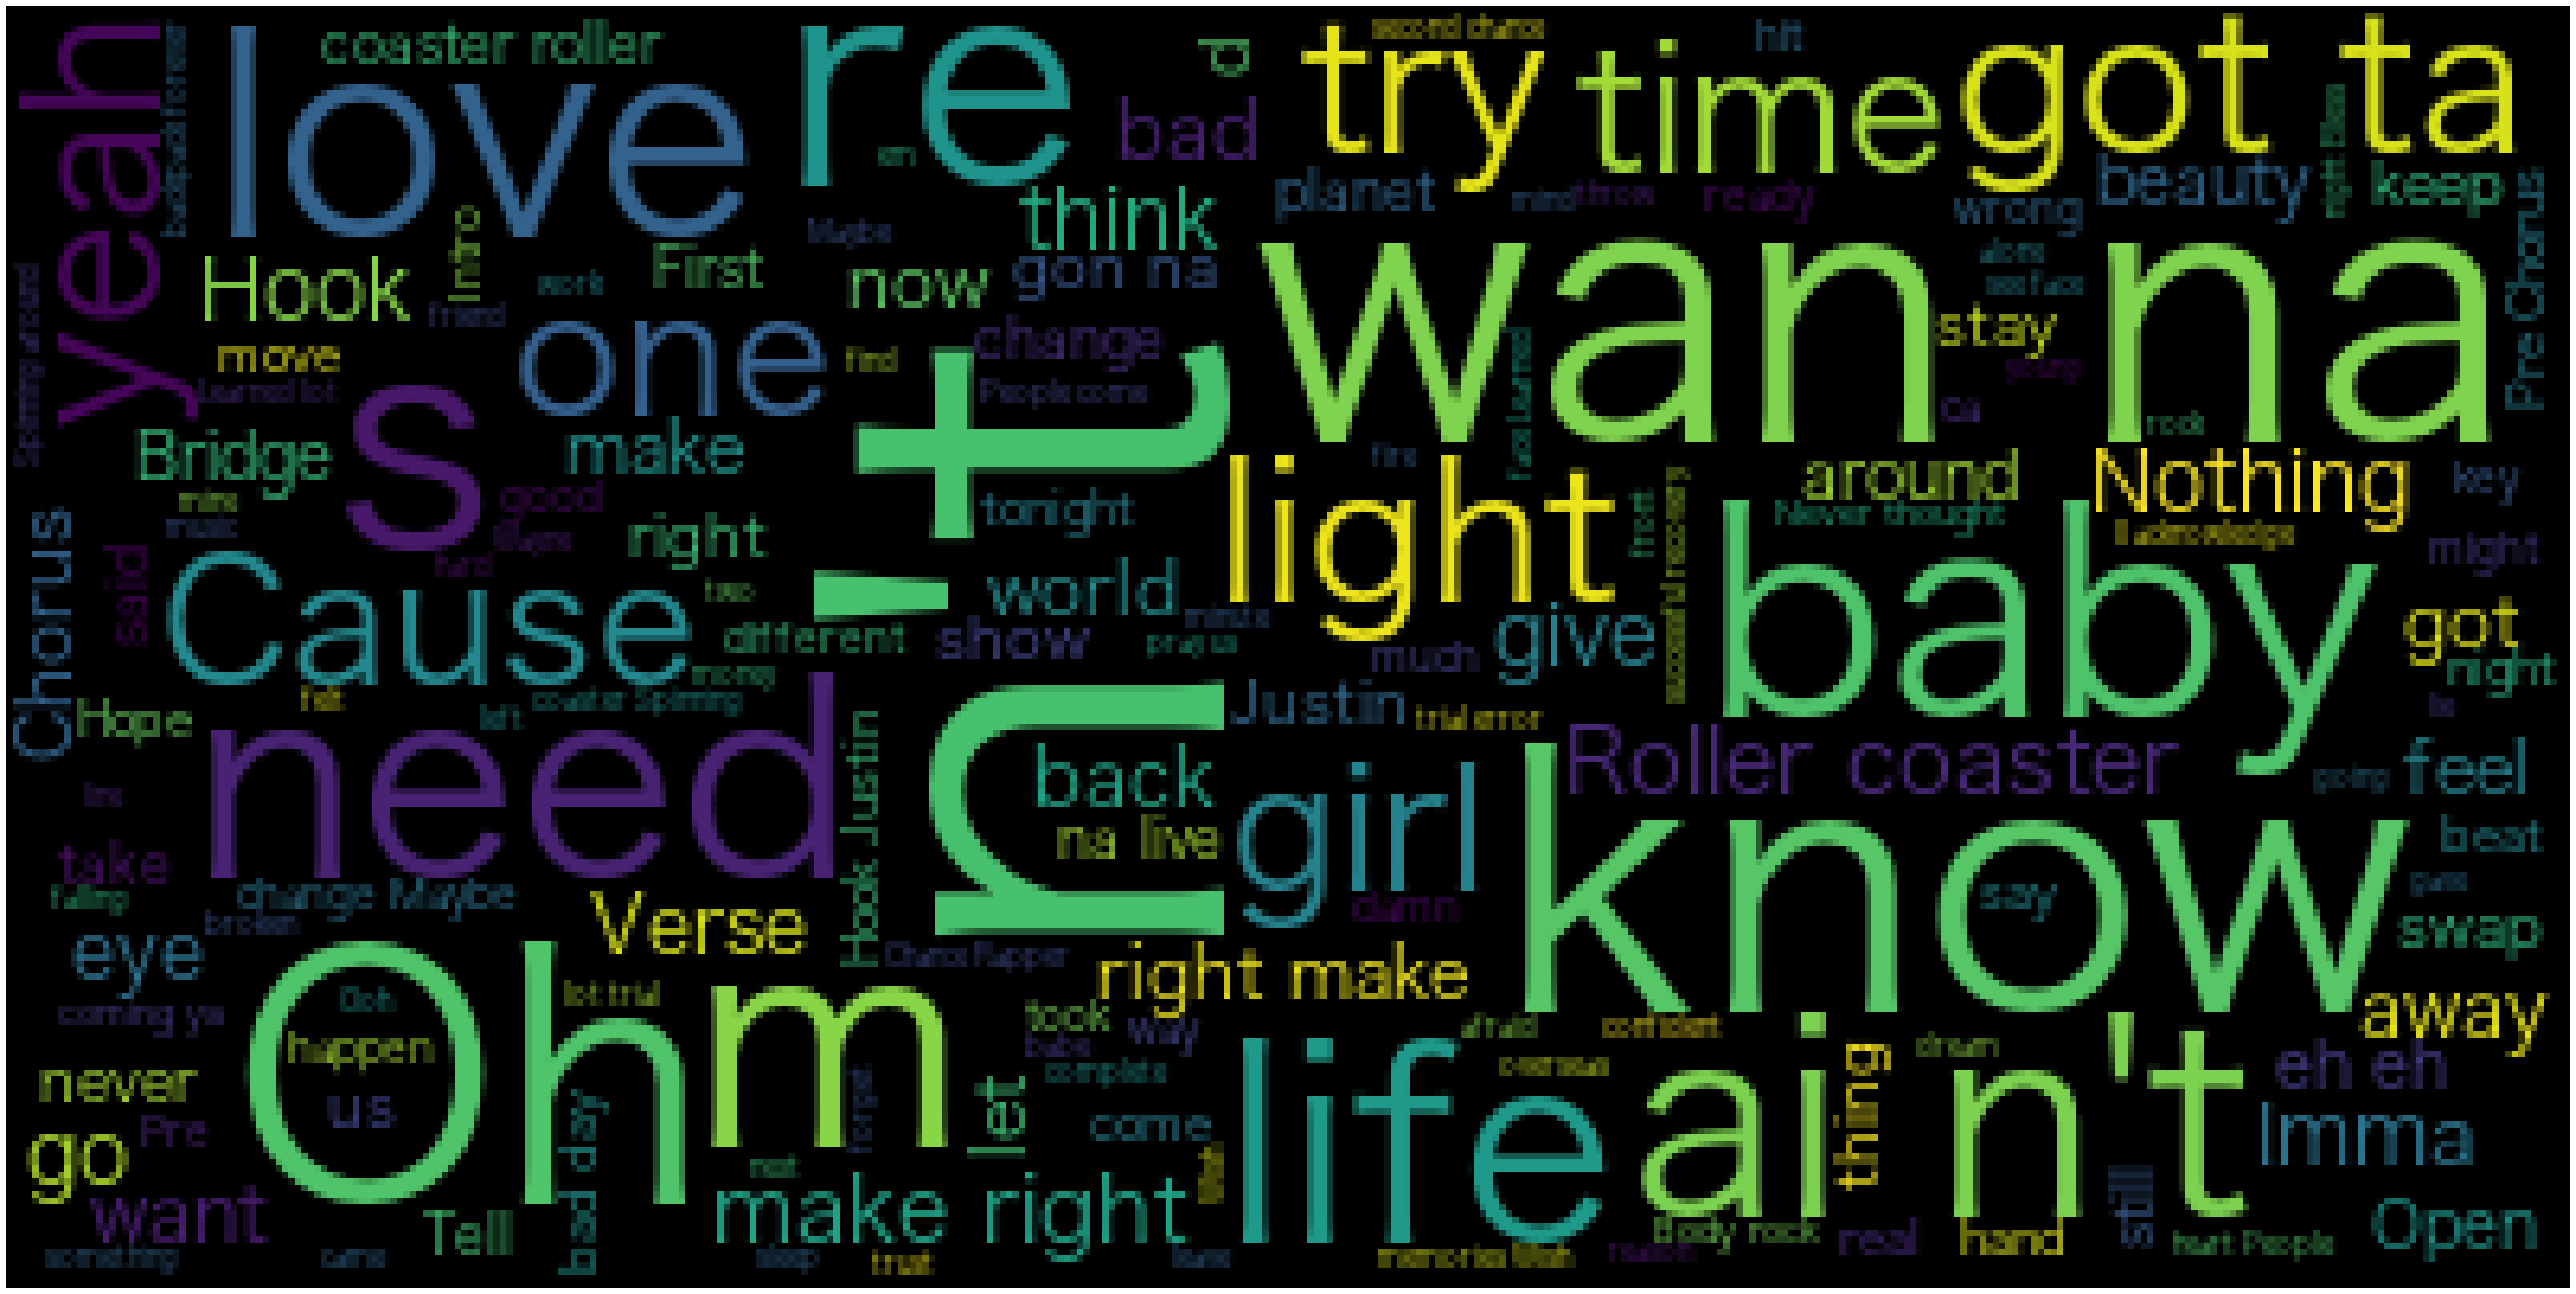

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
plt.imshow(wc)
plt.axis("off")
plt.show()

# Part3

In [54]:
JB_final_date_3_list = []
for x in JB_final_date_3['lyric_token']:
    #print(type(ast.literal_eval(x)))
    JB_final_date_3_list.extend(ast.literal_eval(x))

In [55]:
font_path = 'Hiragino Sans GB.ttc'
wc = WordCloud(background_color = 'black',font_path = font_path)
JB_final_3 = (' ').join(JB_final_date_3_list)
wc.generate(JB_final_3)

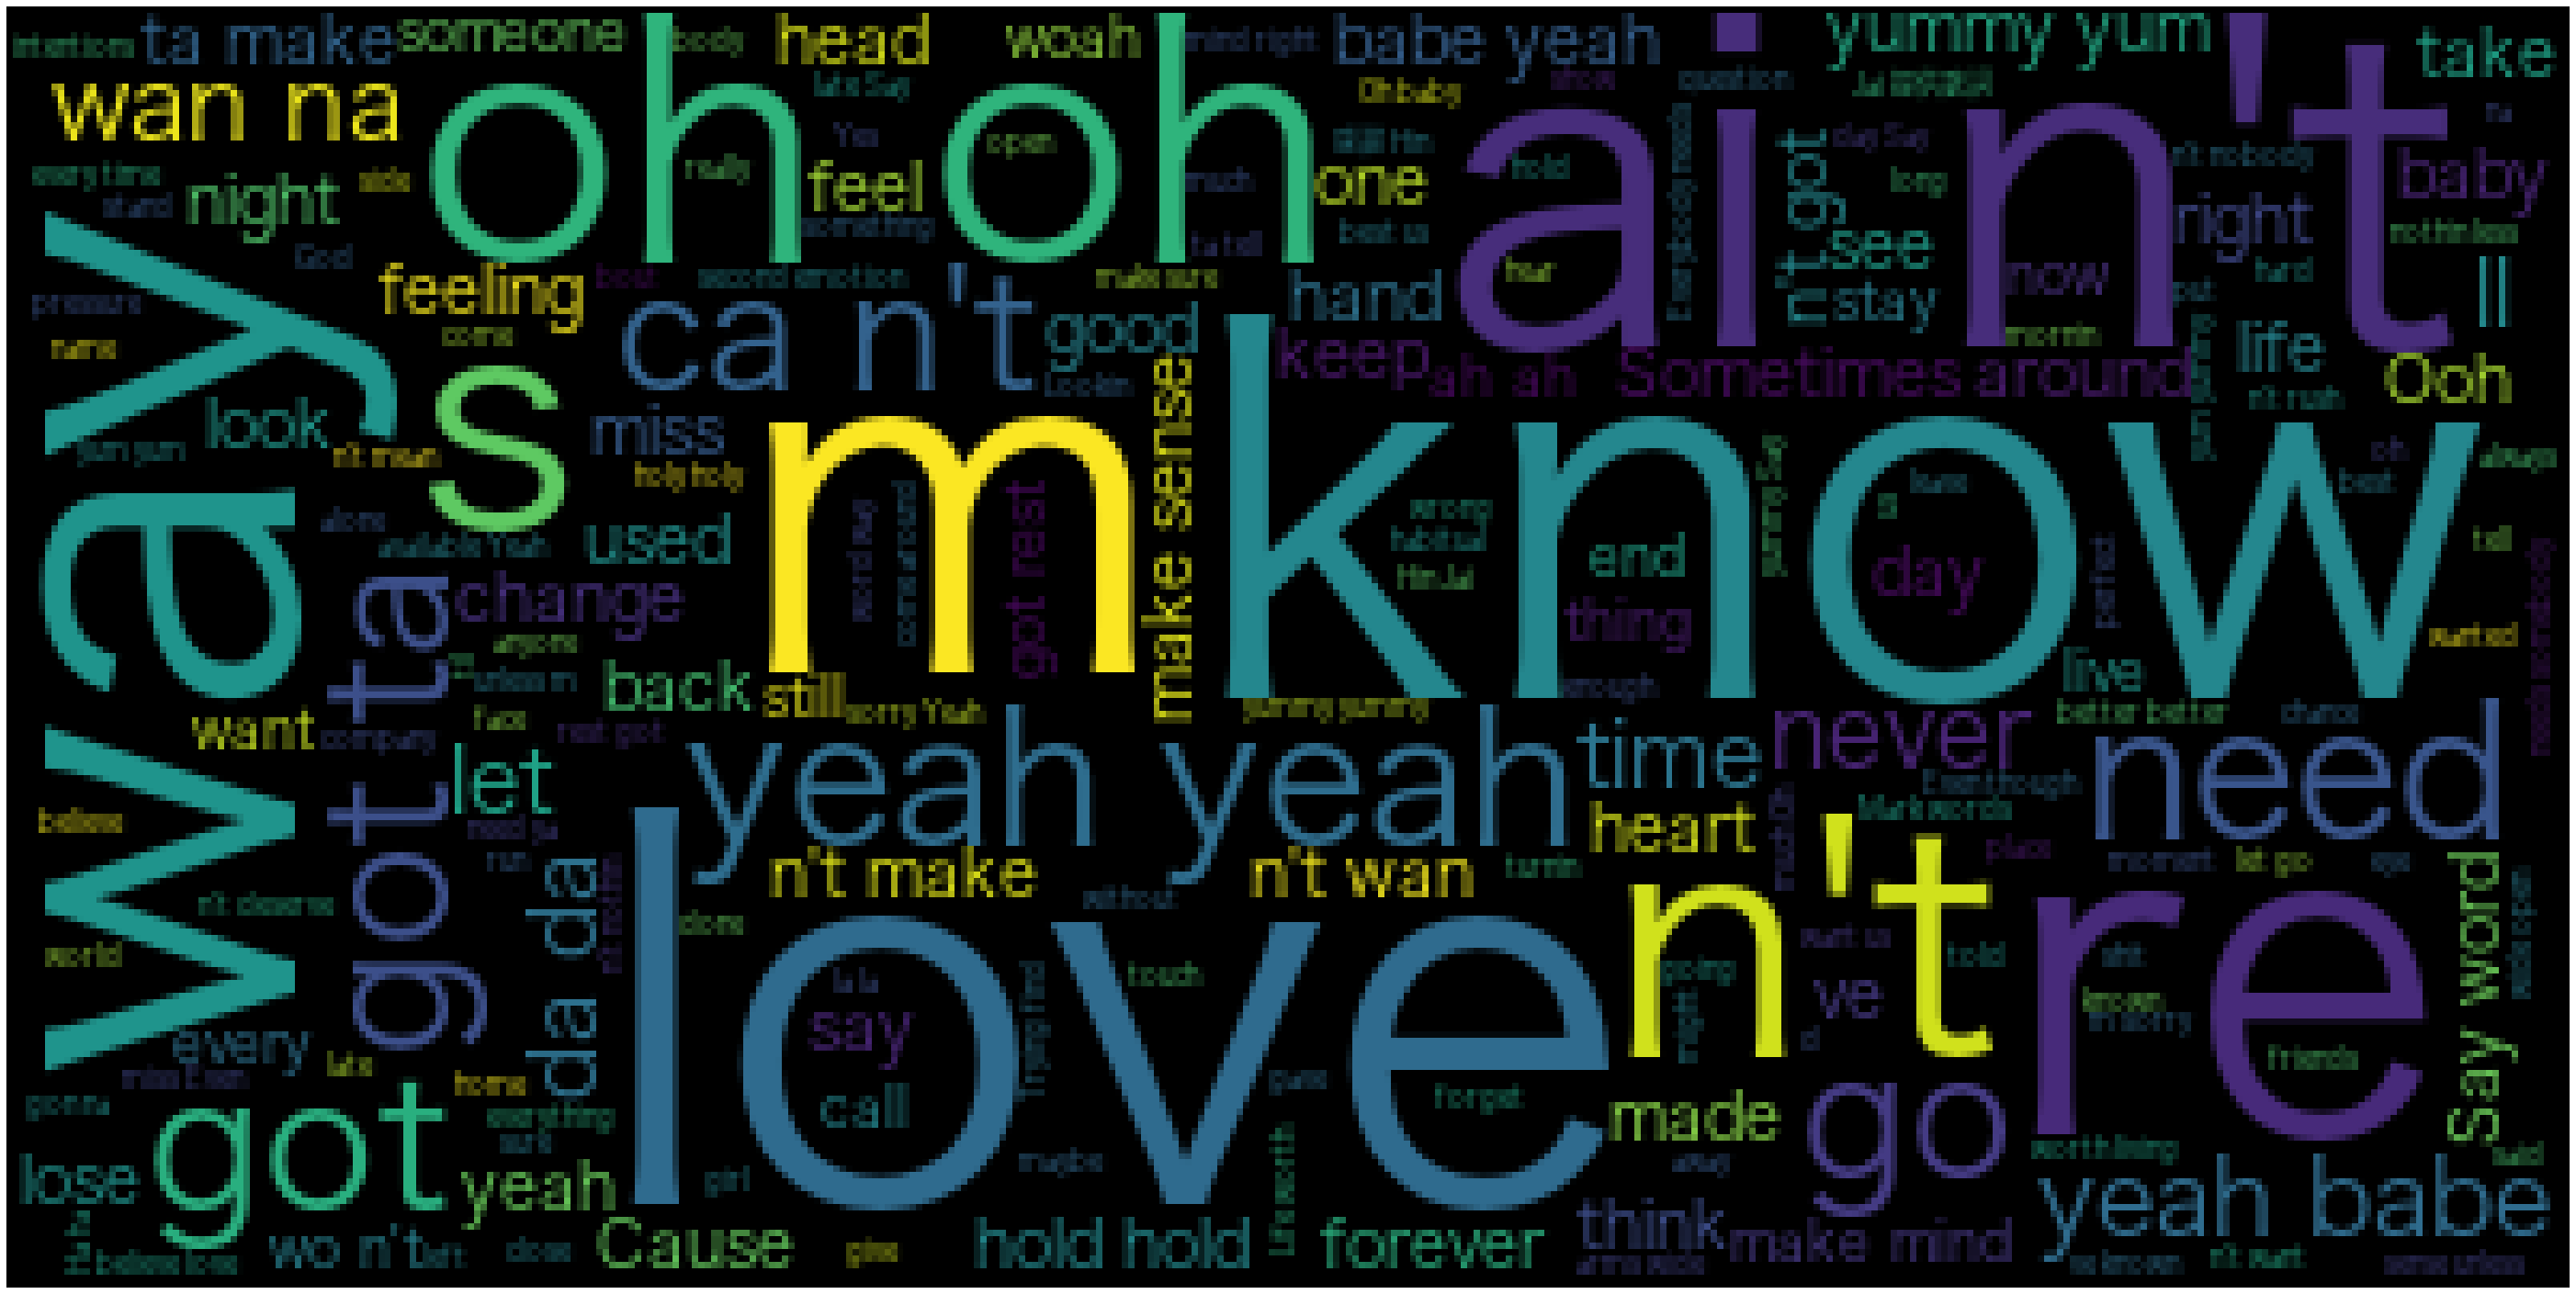

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
plt.imshow(wc)
plt.axis("off")
plt.show()